# Support Vector Machines

In [1]:
#Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

### Read the input file 'Diabetes.csv' using Pandas and check it's column names(1 Marks)

In [2]:
df=pd.read_csv("diabetes.csv")

In [3]:
list(df.columns.values)

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [8]:
# Eye ball the imported dataset
# all records count is showing 768 , hence no missing values based on count
# However if we see min value of features like BMI , Skin Thickness, BP, Glucose, Insulin , it is showing zero . Which indicated 
#there are some missing value existed in data 

In [9]:
(df[['BMI','SkinThickness', 'Insulin','Glucose','BloodPressure']]==0).sum()

BMI               11
SkinThickness    227
Insulin          374
Glucose            5
BloodPressure     35
dtype: int64

In [10]:
assert (df['BMI']!=0).all().all()

AssertionError: 

In [11]:
df[['BMI','SkinThickness', 'Insulin','Glucose','BloodPressure']] = df[['BMI','SkinThickness', 'Insulin','Glucose','BloodPressure']].replace(0, np.nan)

In [12]:
#Imputing missing values wiht mean if that columns. Since data having zero values are more, we cannot use option of removing missing
# values hence used imputing mean with missing value option.
#from sklearn.preprocessing import Imputer
#df[['BMI','SkinThickness', 'Insulin','Glucose','BloodPressure']] = df[['BMI','SkinThickness', 'Insulin','Glucose','BloodPressure']].replace(0, np.nan)
#values = df.values
#imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
#imputed_df= imputer.fit_transform(df)
# count the number of NaN values in each column
#print(np.isnan(transformed_values).sum())

In [13]:
df.fillna(df.mean(), inplace=True)

In [14]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1


In [15]:
df.mean()

Pregnancies                   3.845052
Glucose                     121.686763
BloodPressure                72.405184
SkinThickness                29.153420
Insulin                     155.548223
BMI                          32.457464
DiabetesPedigreeFunction      0.471876
Age                          33.240885
Outcome                       0.348958
dtype: float64

In [16]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1


In [17]:
assert (df['BMI']!=0).all().all()

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.000000,6.000000,17.00
Glucose,768.0,121.686763,30.435949,44.000,99.75000,117.000000,140.250000,199.00
BloodPressure,768.0,72.405184,12.096346,24.000,64.00000,72.202592,80.000000,122.00
SkinThickness,768.0,29.153420,8.790942,7.000,25.00000,29.153420,32.000000,99.00
Insulin,768.0,155.548223,85.021108,14.000,121.50000,155.548223,155.548223,846.00
BMI,768.0,32.457464,6.875151,18.200,27.50000,32.400000,36.600000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.372500,0.626250,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.000000,41.000000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.000000,1.000000,1.00


### Check dimension of dataset

In [19]:
df.shape

(768, 9)

### Check distribution of dependent variable, Outcome and plot it (1 Marks)

In [20]:
df.groupby(df['Outcome']).count()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,500,500,500,500,500,500,500,500
1,268,268,268,268,268,268,268,268


### Out of  768 data points, 500 are labeled as 0 and 268 as 1.
### Outcome 0 means No diabetes, outcome 1 means diabetes

### Check data distribution using summary statistics and provide your findings(2 Marks)

In [21]:
# Provided the findings above , PLEASE REFER ABOVE

### Do correlation analysis and bivariate viualization with Insights(1 Marks)

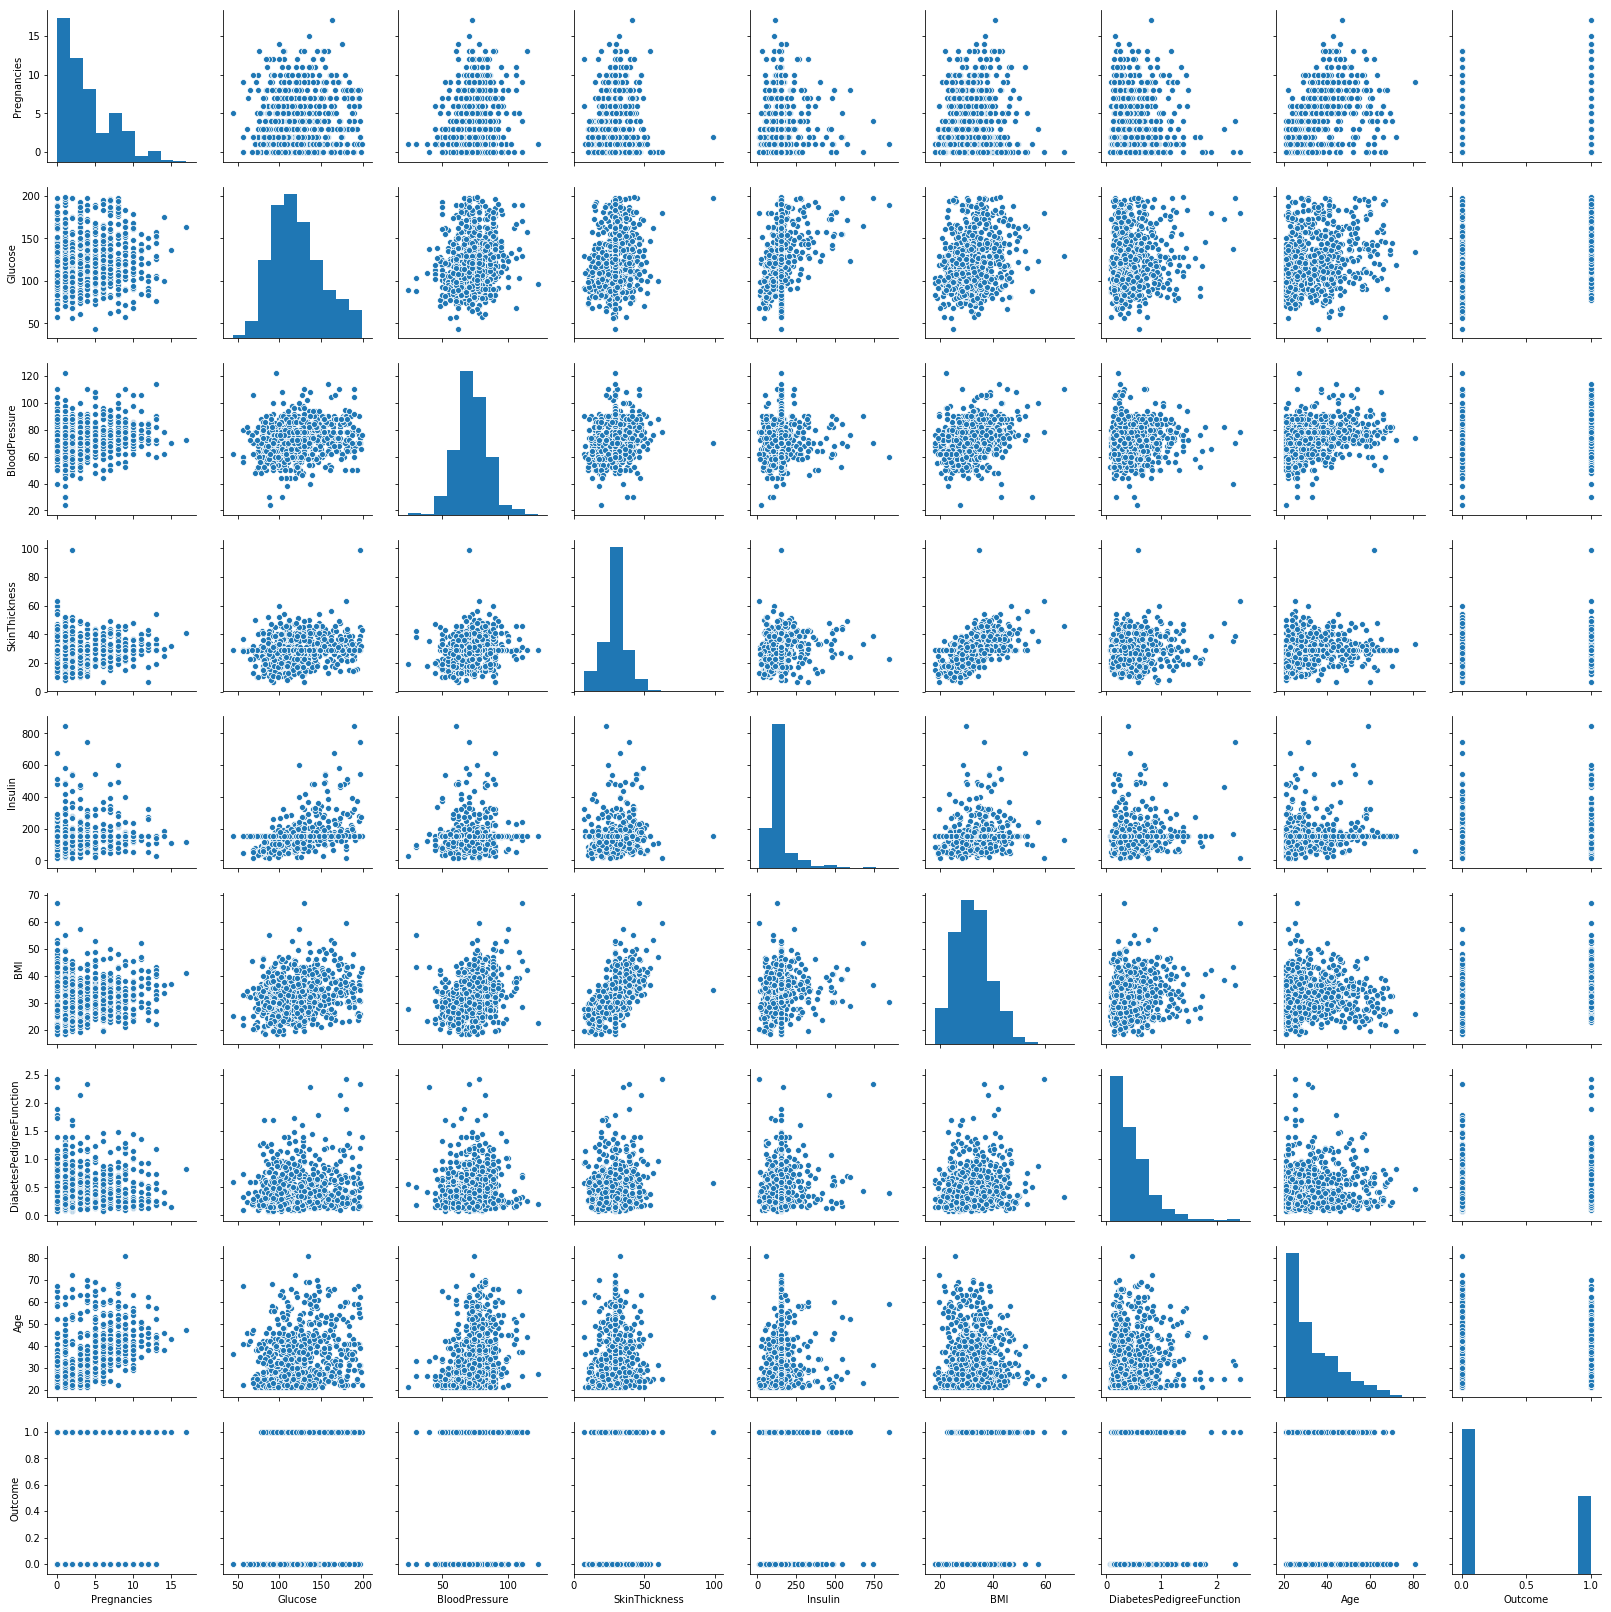

In [22]:
sns.pairplot(df)

In [23]:
#Findings from above Univarient Graphs:
#Glucose, BlookPressure, SkinThickness, BMI are showing gradinet graph, upto certian level there is a increament after that decrease can
# be observed
# Remaining are showing 
#Findings from above Bivarient Graphs:
#insulin vs Gloucose, BMI vs Skinthickness, are right skewing
# Remaining are distrubuted at single place, no patterns found

#### Do train and test split with stratify sampling on Outcome variable to maintain the distribution of dependent variable(1 Marks)

In [24]:
y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 10)

### Train Support Vector Machine Model(1 Marks)

In [25]:
# use from sklearn.svm import SVC

from sklearn import svm
from sklearn.svm import SVC

In [26]:
# Building a Support Vector Machine on train data
svc_model = SVC(kernel='linear', gamma= 1)
svc_model.fit(X_train, y_train)

#prediction = svc_model .predict(X_test)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [27]:
# your insights

### Scale the data points using MinMaxScaler ( 1 Marks)

In [28]:
from sklearn.preprocessing import MinMaxScaler

In [29]:
scaler = MinMaxScaler()

In [30]:
scaler.fit(X_train)

C:\Users\Prasanna\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


MinMaxScaler(copy=True, feature_range=(0, 1))

In [31]:
scaler.transform(X_train)

array([[0.        , 0.76129032, 0.53061224, ..., 0.71574642, 0.29077711,
        0.06666667],
       [0.11764706, 0.27741935, 0.49393045, ..., 0.21881391, 0.29675491,
        0.06666667],
       [0.        , 0.6       , 0.44897959, ..., 0.13496933, 0.02775406,
        0.        ],
       ...,
       [0.17647059, 0.46451613, 0.51020408, ..., 0.16564417, 0.01238258,
        0.05      ],
       [0.05882353, 0.28387097, 0.06122449, ..., 0.75255624, 0.17847993,
        0.08333333],
       [0.29411765, 0.33548387, 0.51020408, ..., 0.31492843, 0.39239966,
        0.36666667]])

### Fit SVM Model on Scale data and give your observation( 1 Marks)

In [32]:
svc_model = SVC(kernel='linear', gamma= 1)
svc_model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

#we can try increasing either C or gamma to fit a more complex model.

### Try improving the model accuracy using C=1000 (1 Marks)

In [33]:
svc_model = SVC(C=1000,kernel='linear', gamma= 1)
svc_model.fit(X_train, y_train)

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### Here, increasing C allows us to improve the model, resulting in ??? accuracy.
### Let's try to explore different Kernel and C (Bonus for practice)

In [34]:
import multiprocessing 
from sklearn.model_selection import GridSearchCV

In [35]:
 param_grid = [    {        
     'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],        
     'C': [ 0.1, 0.2, 0.4, 0.5, 1.0, 1.5, 1.8, 2.0, 2.5, 3.0 ]    } ]

In [36]:
gs = GridSearchCV(estimator=SVC(), param_grid=param_grid,scoring='accuracy', cv=10, n_jobs=multiprocessing.cpu_count())

In [37]:
gs.fit(X_train_scaled, y_train) 

NameError: name 'X_train_scaled' is not defined

In [38]:
gs.best_estimator_

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

In [ ]:
gs.best_score_ 

# Content Based Recommendation System

**About Book Crossing Dataset**<br>

This dataset has been compiled by Cai-Nicolas Ziegler in 2004, and it comprises of three tables for users, books and ratings. Explicit ratings are expressed on a scale from 1-10 (higher values denoting higher appreciation) and implicit rating is expressed by 0.

Reference: http://www2.informatik.uni-freiburg.de/~cziegler/BX/ 

**Objective**

This project entails building a Book Recommender System for users based on user-based and item-based collaborative filtering approaches.

#### Execute the below cell to load the datasets

In [41]:
#Loading data
books = pd.read_csv("books/books.csv", sep=";", error_bad_lines=False, encoding="latin-1")
books.columns = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']

users = pd.read_csv('books/users.csv', sep=';', error_bad_lines=False, encoding="latin-1")
users.columns = ['userID', 'Location', 'Age']

ratings = pd.read_csv('books/ratings.csv', sep=';', error_bad_lines=False, encoding="latin-1")
ratings.columns = ['userID', 'ISBN', 'bookRating']

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'
C:\Users\Prasanna\Anaconda3\lib\site-packages\IPython\core\interactiveshel

### Check no.of records and features given in each dataset

In [42]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
ISBN                 271360 non-null object
bookTitle            271360 non-null object
bookAuthor           271359 non-null object
yearOfPublication    271360 non-null object
publisher            271358 non-null object
imageUrlS            271360 non-null object
imageUrlM            271360 non-null object
imageUrlL            271357 non-null object
dtypes: object(8)
memory usage: 16.6+ MB


In [43]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
userID      278858 non-null int64
Location    278858 non-null object
Age         168096 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [44]:
ratings.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
userID        1149780 non-null int64
ISBN          1149780 non-null object
bookRating    1149780 non-null int64
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


## Exploring books dataset

In [45]:
books.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [46]:
books.describe().T

,count,unique,top,freq
ISBN,271360,271360,0517118424,1
bookTitle,271360,242135,Selected Poems,27
bookAuthor,271359,102023,Agatha Christie,632
yearOfPublication,271360,202,2002,13903
publisher,271358,16807,Harlequin,7535
imageUrlS,271360,271044,http://images.amazon.com/images/P/015670160X.0...,2
imageUrlM,271360,271044,http://images.amazon.com/images/P/038529932X.0...,2
imageUrlL,271357,271041,http://images.amazon.com/images/P/140003065X.0...,2


In [47]:
books.dtypes

ISBN                 object
bookTitle            object
bookAuthor           object
yearOfPublication    object
publisher            object
imageUrlS            object
imageUrlM            object
imageUrlL            object
dtype: object

### Drop last three columns containing image URLs which will not be required for analysis

In [48]:
books=books.drop(columns=['imageUrlS','imageUrlM','imageUrlL'])

In [49]:
books.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


**yearOfPublication**

### Check unique values of yearOfPublication


In [50]:
books.yearOfPublication.unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

As it can be seen from above that there are some incorrect entries in this field. It looks like Publisher names 'DK Publishing Inc' and 'Gallimard' have been incorrectly loaded as yearOfPublication in dataset due to some errors in csv file.


Also some of the entries are strings and same years have been entered as numbers in some places. We will try to fix these things in the coming questions.

### Check the rows having 'DK Publishing Inc' as yearOfPublication

In [51]:
books[books['yearOfPublication']=='DK Publishing Inc'] # or books['yearOfPublication']=='Gallimard'] #and books['yearOfPublication']=='Gallimard']

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...


### Drop the rows having `'DK Publishing Inc'` and `'Gallimard'` as `yearOfPublication`

In [52]:
books[books['yearOfPublication']=='Gallimard']

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...


In [53]:
books.drop(books[books['yearOfPublication']=='Gallimard'].index,inplace=True)

In [54]:
books.drop(books[books['yearOfPublication']=='DK Publishing Inc'].index,inplace=True)

### Change the datatype of yearOfPublication to 'int'

In [55]:
books['yearOfPublication']=books['yearOfPublication'].apply(pd.to_numeric)

In [56]:
books.dtypes

ISBN                 object
bookTitle            object
bookAuthor           object
yearOfPublication     int64
publisher            object
dtype: object

### Drop NaNs in `'publisher'` column


In [57]:
books.isnull().sum()

ISBN                 0
bookTitle            0
bookAuthor           1
yearOfPublication    0
publisher            2
dtype: int64

In [58]:
books.isnull().sum()

ISBN                 0
bookTitle            0
bookAuthor           1
yearOfPublication    0
publisher            2
dtype: int64

## Exploring Users dataset

In [60]:
print(users.shape)
users.head()

(278858, 3)


,userID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


### Get all unique values in ascending order for column `Age`

In [61]:
np.sort(users.Age.unique())

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 113., 114., 115., 116., 118., 119., 123., 124., 127.,
       128., 132., 133., 136., 137., 138., 140., 141., 143., 146., 147.,
       148., 151., 152., 156., 157., 159., 162., 168., 172., 175., 183.,
       186., 189., 199., 200., 201., 204., 207., 20

Age column has some invalid entries like nan, 0 and very high values like 100 and above

### Values below 5 and above 90 do not make much sense for our book rating case...hence replace these by NaNs

In [62]:
users[(users['Age']< 5) |(users['Age']> 90)]

,userID,Location,Age
219,220,"bogota, bogota, colombia",0.0
469,470,"indianapolis, indiana, usa",0.0
561,562,"adfdaf, australian capital territory, albania",0.0
612,613,"ankara, n/a, turkey",1.0
670,671,"jeddah, jeddah, saudi arabia",1.0
931,932,"san francisco, california, usa",1.0
1148,1149,"orlando, florida, usa",1.0
1288,1289,"san jose, california, usa",103.0
1322,1323,"milano, lombardia, italy",104.0
1460,1461,"kolding, none, denmark",0.0


In [63]:
users=users.replace((users['Age']< 5) |(users['Age']> 90),np.nan)

In [64]:
users.where((users['Age']> 5), inplace=True)

In [65]:
users.where((users['Age']<90 ), inplace=True)

### Replace null values in column `Age` with mean

In [66]:
users.Age.fillna(users.Age.mean(), inplace=True)

### Change the datatype of `Age` to `int`

In [67]:
users['Age']=users['Age'].apply(pd.to_numeric)

In [68]:
print(sorted(users.Age.unique()))

[6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 34.72681750853058, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0]


## Exploring the Ratings Dataset

### check the shape

In [69]:
ratings.shape

(1149780, 3)

In [70]:
n_users = users.shape[0]
n_books = books.shape[0]

In [71]:
ratings.head(5)

,userID,ISBN,bookRating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


### Ratings dataset should have books only which exist in our books dataset. Drop the remaining rows

In [72]:
ratings_new=ratings[ratings.ISBN.isin(books.ISBN)]

In [73]:
ratings_new.shape

(1031132, 3)

In [74]:
ratings.shape

(1149780, 3)

### Ratings dataset should have ratings from users which exist in users dataset. Drop the remaining rows

In [75]:
ratings_new=ratings_new[ratings_new.userID.isin(users.userID)]

In [76]:
ratings_new.shape

(748116, 3)

### Consider only ratings from 1-10 and leave 0s in column `bookRating`

In [77]:
ratings_not0=ratings_new[ratings_new.bookRating!=0]

In [78]:
ratings.bookRating.unique()

array([ 0,  5,  3,  6,  8,  7, 10,  9,  4,  1,  2], dtype=int64)

In [79]:
ratings_not0.bookRating.unique()

array([ 3,  6,  9,  8,  7,  5, 10,  1,  4,  2], dtype=int64)

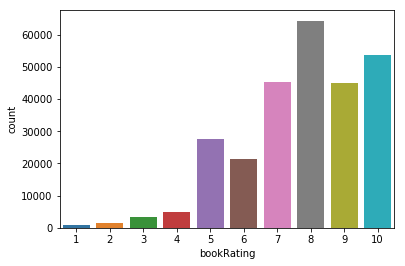

In [80]:
sns.countplot(data=ratings_not0,x='bookRating')

In [81]:
ratings_not0

,userID,ISBN,bookRating
3,276729,052165615X,3
4,276729,0521795028,6
16,276747,0060517794,9
19,276747,0671537458,9
20,276747,0679776818,8
21,276747,0943066433,7
23,276747,1885408226,7
24,276748,0747558167,6
28,276754,0684867621,8
29,276755,0451166892,5


### Find out which rating has been given highest number of times

In [82]:
#From the above plot rating 8  has been givne higest times

### **Collaborative Filtering Based Recommendation Systems**

### For more accurate results only consider users who have rated atleast 100 books

In [83]:
users.head()

,userID,Location,Age
0,NaN,NaN,34.726818
1,2.0,"stockton, california, usa",18.000000
2,NaN,NaN,34.726818
3,4.0,"porto, v.n.gaia, portugal",17.000000
4,NaN,NaN,34.726818


In [85]:
users.isnull().sum()

userID      112105
Location    112105
Age              0
dtype: int64

In [98]:
#ratings_not0
max_count=ratings_not0.groupby(ratings_not0['userID']).count()

In [101]:
ratings_100=max_count[max_count['bookRating']>100]

In [103]:
#ratings_100
ratings_100.isnull().sum()

ISBN          0
bookRating    0
dtype: int64

### Generating ratings matrix from explicit ratings


#### Note: since NaNs cannot be handled by training algorithms, replace these by 0, which indicates absence of ratings

### Generate the predicted ratings using SVD with no.of singular values to be 50

In [104]:
from surprise import SVD
from surprise import accuracy

In [105]:
svd_model = SVD(n_factors=50,biased=False)
svd_model.fit(ratings_100)

AttributeError: 'DataFrame' object has no attribute 'global_mean'

### Take a particular user_id

### Lets find the recommendations for user with id `2110`

#### Note: Execute the below cells to get the variables loaded

In [ ]:
userID = 2110

In [ ]:
user_id = 2 #2nd row in ratings matrix and predicted matrix

### Get the predicted ratings for userID `2110` and sort them in descending order

### Create a dataframe with name `user_data` containing userID `2110` explicitly interacted books

In [ ]:
user_data.head()

In [ ]:
user_data.shape

### Combine the user_data and and corresponding book data(`book_data`) in a single dataframe with name `user_full_info`

In [ ]:
book_data.shape

In [ ]:
book_data.head()

In [ ]:
user_full_info.head()

### Get top 10 recommendations for above given userID from the books not already rated by that user